# 1. Introduction

Dataset : https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

Objective    : Membuat sebuah model Classification yang dapat melakukan prediksi untuk mengetahui Tipe Berat badan, apakah seseorang tersebut insufficient_weight, normal, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III, Overweight_Level_I atau Overweight_Level_II 

## **Latar Belakang**

Seiring berjalannya waktu, gaya hidup modern telah memengaruhi pola makan dan aktivitas fisik di seluruh dunia, yang telah berkontribusi pada peningkatan masalah obesitas.

Data mencakup informasi tentang kebiasaan makan, kondisi fisik, usia, jenis kelamin, dan karakteristik individu lainnya.

Data yang dikumpulkan kemudian diolah dan diberi label untuk menciptakan variabel kelas NObesity, yang mencerminkan tingkat obesitas individu. Ini dilakukan dengan merujuk pada panduan dari Organisasi Kesehatan Dunia (WHO). Hasil dari penelitian ini akan memberikan wawasan berharga tentang faktor-faktor yang mempengaruhi obesitas dan dapat membantu dalam pengembangan program-program pencegahan dan pengelolaan obesitas.

# 2. Import Libraries 

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [583]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kendalltau
import pickle
import plotly.express  as px


# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer , OutlierTrimmer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTENC
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#model
from sklearn.cluster import KMeans

# Untuk membuat Silhouette Plot
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

#Untuk mengabaikan fitur peringatan
import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [584]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


| Nama Kolom                   | Keterangan                         |
|-----------------------------|-----------------------------------|
| Gender                      | Jenis Kelamin                     |
| Age                         | Umur                              |
| Height                      | Tinggi Badan                      |
| Weight                      | Berat Badan                        |
| family_history_with_overweight | Riwayat Keluarga dengan Berat Badan Lebih |
| FAVC                        | Frekuensi makan berkalori tinggi  |
| FCVC                        | Frekuensi makan sayur              |
| NCP                         | Frekuensi makan makanan berat      |
| CAEC                        | Frekuensi makan makanan ringan di antara makan berat |
| SMOKE                       | Perokok atau bukan                 |
| CH2O                        | Frekuensi konsumsi air setiap harinya |
| SCC                         | Memantau konsumsi kalori           |
| FAF                         | Frekuensi aktivitas fisik         |
| TUE                         | Waktu menggunakan gadget           |
| CALC                        | Frekuensi konsumsi alkohol         |
| MTRANS                      | Transportasi yang dinaiki          |
| NObeyesdad                  | Tipe Berat Badan                   |


In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [586]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [587]:
# Mengganti nilai dalam kolom berdasarkan kondisi
df['FCVC'] = df['FCVC'].apply(lambda x: 1 if x >= 3 else (2 if x >= 2 else 3))

In [588]:
# Mengganti nilai dalam beberapa kolom berdasarkan kondisi
columns_to_modify = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in columns_to_modify:
    df[col] = df[col].apply(lambda x: 1 if x >= 3 else (2 if x >= 2 else 3))

In [589]:
# Mengganti type data Age dan Weight menjadi int
df['Age'] = df['Age'].astype(int)
df['Weight'] = df['Weight'].astype(int)

In [590]:
# Meghapus angka dibelakang koma dan membulatkanya
df['Height'] = df['Height'].apply(lambda x: round(x, 1))

In [591]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.6,64,yes,no,2,1,Sometimes,no,2,no,3,3,no,Public_Transportation,Normal_Weight
1,Female,21,1.5,56,yes,no,3,1,Sometimes,yes,1,yes,1,3,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.8,77,yes,no,2,1,Sometimes,no,2,no,2,3,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.8,87,no,no,3,1,Sometimes,no,2,no,2,3,Frequently,Walking,Overweight_Level_I
4,Male,22,1.8,89,no,no,2,3,Sometimes,no,2,no,3,3,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29,1.6,53,no,yes,2,1,Sometimes,no,2,no,3,3,Sometimes,Automobile,Normal_Weight
6,Female,23,1.5,55,yes,yes,3,1,Sometimes,no,2,no,3,3,Sometimes,Motorbike,Normal_Weight
7,Male,22,1.6,53,no,no,2,1,Sometimes,no,2,no,1,3,Sometimes,Public_Transportation,Normal_Weight
8,Male,24,1.8,64,yes,yes,3,1,Sometimes,no,2,no,3,3,Frequently,Public_Transportation,Normal_Weight
9,Male,22,1.7,68,yes,yes,2,1,Sometimes,no,2,no,3,3,no,Public_Transportation,Normal_Weight


In [592]:
df.tail(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2101,Female,25,1.6,107,yes,yes,3,1,Sometimes,no,2,no,3,3,Sometimes,Public_Transportation,Obesity_Type_III
2102,Female,25,1.6,108,yes,yes,3,1,Sometimes,no,2,no,3,3,Sometimes,Public_Transportation,Obesity_Type_III
2103,Female,21,1.7,133,yes,yes,3,1,Sometimes,no,3,no,3,3,Sometimes,Public_Transportation,Obesity_Type_III
2104,Female,21,1.7,133,yes,yes,3,1,Sometimes,no,3,no,3,3,Sometimes,Public_Transportation,Obesity_Type_III
2105,Female,21,1.7,131,yes,yes,3,1,Sometimes,no,3,no,3,3,Sometimes,Public_Transportation,Obesity_Type_III
2106,Female,20,1.7,131,yes,yes,3,1,Sometimes,no,3,no,3,3,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,1.7,133,yes,yes,3,1,Sometimes,no,2,no,3,3,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,1.8,133,yes,yes,3,1,Sometimes,no,2,no,3,3,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.7,133,yes,yes,3,1,Sometimes,no,2,no,3,3,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23,1.7,133,yes,yes,3,1,Sometimes,no,2,no,3,3,Sometimes,Public_Transportation,Obesity_Type_III


In [593]:
data_duplicated = df.copy()

In [594]:
# Melihat Missing Values pada dataset
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Tidak ada terdapat missing values

# 4. Exploratory Data Analysis (EDA)

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

#### Melihat Distribusi Tipe Berat Badan

In [595]:
# Hitung jumlah masing-masing nilai pada kolom 'NObeyesdad'
value_counts = data_duplicated['NObeyesdad'].value_counts()

# Buat DataFrame untuk pie chart
df_pie = pd.DataFrame({'NObeyesdad': value_counts.index, 'Count': value_counts.values})

# Buat pie chart dengan Plotly Express
fig = px.pie(df_pie, names='NObeyesdad', values='Count', title='Sebaran NObeyesdad')
fig.show()

Insight : 
- Insufficient_Weight memiliki pesebaran paling sedikit
- Obesity_Type_I memiliki pesebaran paling banyak

Dari data ini dapat disimpulkan bahwa sudah banyak orang yang bertipe berat badan Obesitas dikarenakan pesebaran data Insufficient_weight (Berat badan kurang) dan Normal_Weight memiliki pesebaran yang paling sedikit dan sisanya sudah masuk tipe berat badan yang tidak baik atau obesitas.

#### Melihat di umur berapa yang paling banyak tipe berat badan Obesity_Type_III

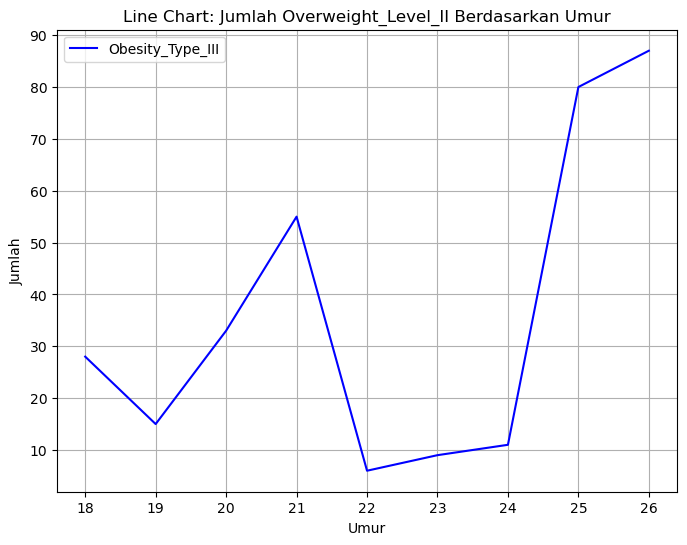

In [596]:
# filter data untuk melihat overweight
filtered_data = data_duplicated[data_duplicated['NObeyesdad']== 'Obesity_Type_III']

value_counts = filtered_data.groupby(['Age', 'NObeyesdad']).size()

# Menghitung jumlah data pada setiap nilai umur
age_counts = filtered_data['Age'].value_counts().sort_index()

# Menyiapkan data untuk plot
x = age_counts.index
y = age_counts.values

# Membuat line chart
plt.figure(figsize=(8, 6))  # Mengatur ukuran grafik
plt.plot(x, y, marker='', linestyle='-', color='b', label='Obesity_Type_III')  # Membuat garis
plt.title('Line Chart: Jumlah Overweight_Level_II Berdasarkan Umur')  # Memberikan judul grafik
plt.xlabel('Umur')  # Memberikan label pada sumbu X
plt.ylabel('Jumlah')  # Memberikan label pada sumbu Y
plt.legend()  # Menampilkan legenda
plt.grid(True)  # Menampilkan grid
plt.show()  # Menampilkan grafik

Insight :

Tipe Berat badan Obesity_Type_III paling banyak dialami oleh umur diatas 20 tahun, dapat disimpulkan bahwa pada range umur ini banyak orang yang melakukan pola hidup tidak sehat yang mengakibatkan obesitas 

#### Melihat rata - rata usia berdasarkan tipe berat badannya

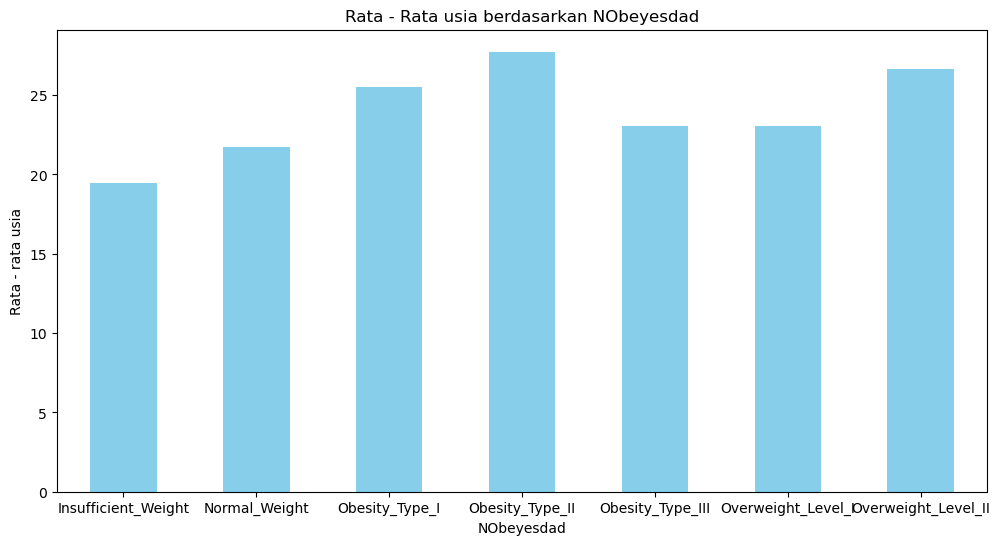

In [597]:
# Menghitung rata-rata usia berdasarkan Nobeyesdad
bar_data = data_duplicated.groupby(data_duplicated['NObeyesdad'])['Age'].mean()

# Create a bar chart from the data
plt.figure(figsize=(12, 6))
bar_data.plot(kind='bar', color='skyblue')
plt.xlabel('NObeyesdad')
plt.ylabel('Rata - rata usia')
plt.title('Rata - Rata usia berdasarkan NObeyesdad')
plt.xticks(rotation=0)  # Set rotation to 0 if you don't want to rotate x-axis labels
plt.show()

Insight :

- Rata - rata dari tipe berat badan berada pada umur 20 tahun keatas
- Obesity_Type_II memiliki rata - rata usia paling tinggi
- Insufficient_Weight memiliki rata - rata usia paling rendah

Dari data ini dapat disimpulkan bahwa rata - rata orang mulai masuk ke tipe berat badan obesitas pada usia muda yang bisa disebabkan karena pola hidup tidak sehat.

#### Melihat Distribusi Tipe berat badan berdasarkan Gender

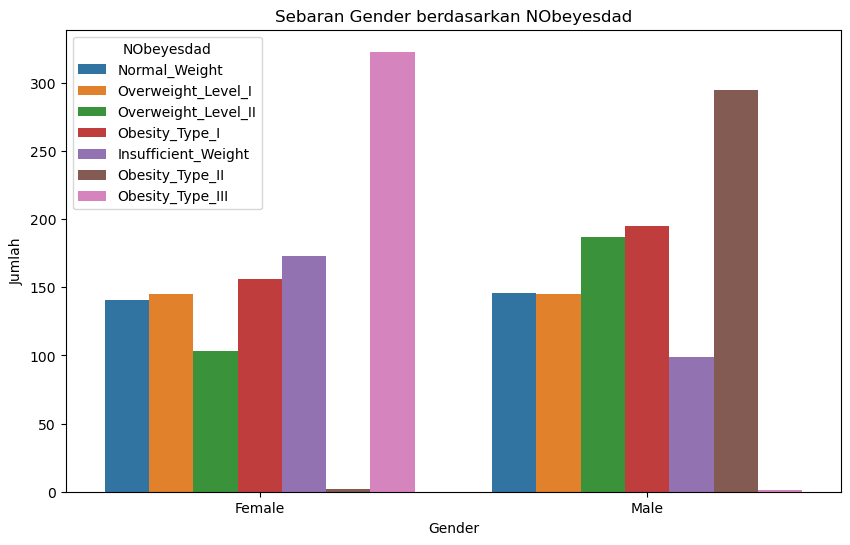

In [598]:
# Visualisasi Gender berdasarkan NObeyesdad
plt.figure(figsize=(10, 6))
sns.countplot(data=data_duplicated, x='Gender', hue='NObeyesdad')
plt.title('Sebaran Gender berdasarkan NObeyesdad')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.legend(title='NObeyesdad')

plt.show()

Insight :

- Perempuan memiliki jumlah terbanyak di Obesity_Type_III
- Laki - laki memiliki jumlah terbanyak di Obesity_Type_II

Berdasarkan data ini dapat dilihat bahwa Obesitas tidak mengenal gender, semua bisa terkena obesitas jika tidak melakukan pola hidup sehat.

#### Melihat Distribusi Tipe Berat Badan berdasarkan Umur

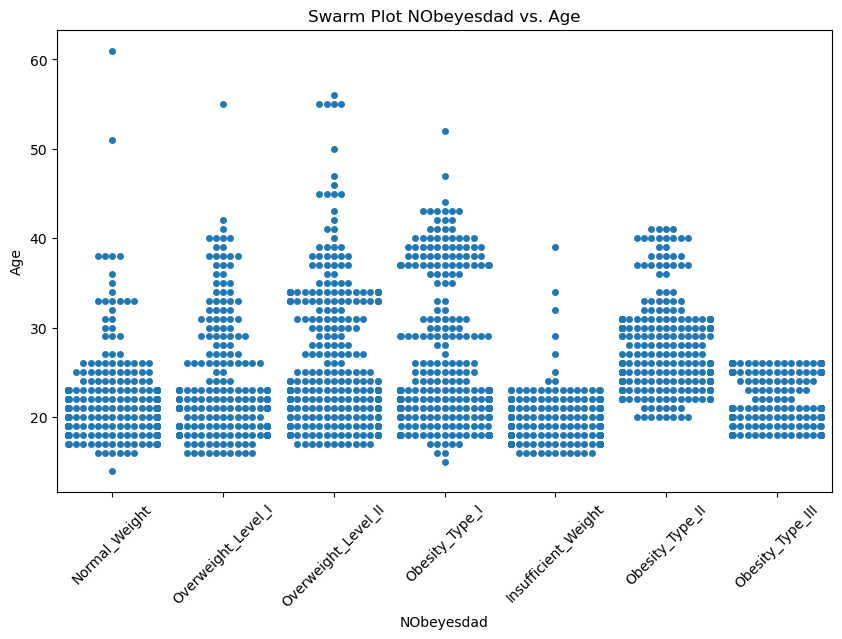

In [599]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data_duplicated, x='NObeyesdad', y='Age')
plt.title('Swarm Plot NObeyesdad vs. Age')
plt.xlabel('NObeyesdad')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

Insight :

- Semua tipe berat badan berada di range umur 20 - 30 tahun
- Obesity_Type_I dan Overweight_Level_II memiliki data paling banyak
- Titik-titik yang jauh dari gugusan utama dapat dianggap sebagai outlier. Di "Normal_Weight,"dapat dilihat beberapa titik yang jauh lebih tinggi dari gugusan utama, menunjukkan beberapa individu yang lebih tua dalam kategori ini dibandingkan dengan mayoritas

Dari data tersebut dapat dilihat bahwa range umur pada distribusi ini terbanyak ada di range umur 20 - 30. Dari range umur tersebut dapat dilihat bahwa banyak yang sudah obesitas dan berat badan kurang.

#### Melihat persentasi banyaknya perokok yang mempunyai tipe berat badan Overweight_Level_II

In [600]:
# Filter data untuk melihat overweight
filtered_data = data_duplicated[data_duplicated['NObeyesdad'] == 'Overweight_Level_II']

# Hitung jumlah masing-masing nilai pada kolom 'SMOKE'
value_counts = filtered_data['SMOKE'].value_counts()

# Buat DataFrame untuk pie chart
df_pie = pd.DataFrame({'SMOKE': value_counts.index, 'Count': value_counts.values})

# Buat pie chart dengan Plotly Express
fig = px.pie(df_pie, names='SMOKE', values='Count', title="Perbandingan SMOKE dengan NObeyesdad")
fig.show()

Insight :

Tipe berat badan Overweight_Level_II mayoritas bukan perokok, jadi merokok bukan salah satu faktor pasti untuk orang menjadi obesitas

#### Melihat apakah memiliki riwayat keturunan merupakan salah satu faktor terkena obesitas

In [601]:
# Filter data untuk kategori NObeyesdad yang diinginkan
filtered_data = data_duplicated[data_duplicated['NObeyesdad'].isin(['Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I'])]

# Hitung jumlah masing-masing nilai pada kolom 'family_history_with_overweight'
value_counts = filtered_data['family_history_with_overweight'].value_counts().reset_index()

# Buat DataFrame untuk pie chart
df_pie = pd.DataFrame({'family_history_with_overweight': value_counts['index'], 'Count': value_counts['family_history_with_overweight']})

# Buat pie chart dengan Plotly Express
fig = px.pie(df_pie, names='family_history_with_overweight', values='Count', title="Perbandingan family_history_with_overweight dengan NObeyesdad")
fig.show()

Insight :

Dari data ini dapat disimpulkan bahwa jika memiliki riwayat obesitas merupakan salah satu faktor terbesar orang tersebut juga dapat obesitas

#### Apakah konsumsi kalori tinggi jadi faktor terkena obesitas

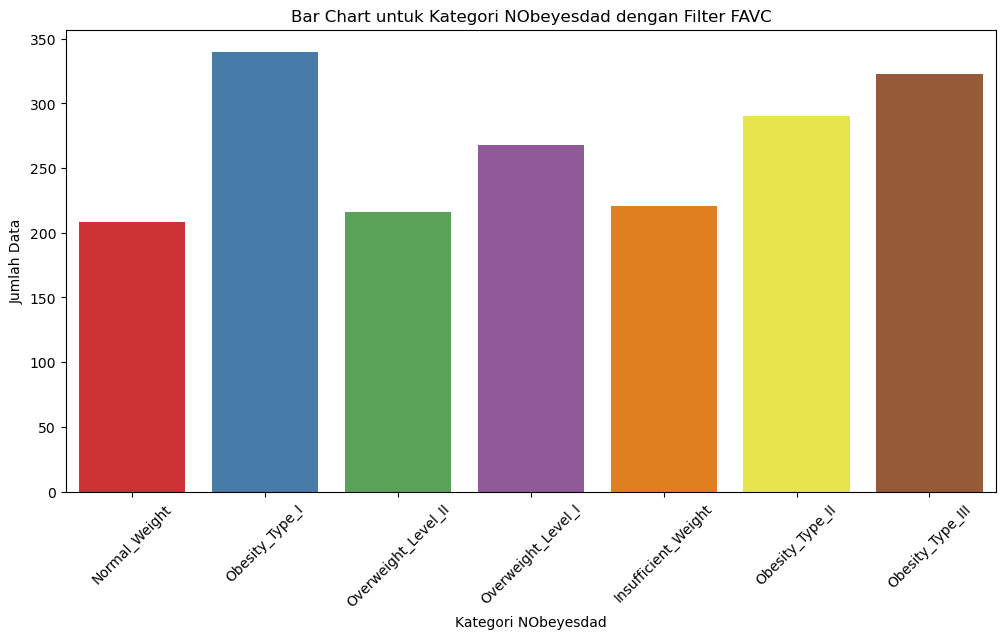

In [602]:
# Filter data berdasarkan FAVC
filtered_data = data_duplicated[data_duplicated['FAVC'] == 'yes']

# Buat bar chart
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='NObeyesdad', palette='Set1')
plt.xlabel('Kategori NObeyesdad')
plt.ylabel('Jumlah Data')
plt.title('Bar Chart untuk Kategori NObeyesdad dengan Filter FAVC')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()

Dari data ini dapat dilihat bahwa pengkonsumsi kalori tinggi terbanyak ada di Obesity_Type_I yang berarti adalah makanan dengan kalori tinggi merupakan salah satu faktor pendukung untuk seseorang dapat bertipe obesitas jika dibarengi dengan pola hidup tidak sehat.

# 5. Feature Engineering

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Handling Missing Values

In [603]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Handling Missing Values tidak dilakukan karena dataset tidak memiliki Missing Values

## Check Cardinality

#### Check Cardinality Numerical

In [604]:
card_num = ['Age','Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

cardinality_df = pd.DataFrame({'Column': card_num, 'Cardinality': [data_duplicated[col].nunique() for col in card_num]})

print(cardinality_df)

   Column  Cardinality
0     Age           40
1  Height            7
2  Weight          115
3    FCVC            3
4     NCP            3
5    CH2O            3
6     FAF            3
7     TUE            2


Column 'Age' dan 'Weight' memiliki high cardinality

#### Check Cardinality Categorical

In [605]:
card_cat = ['Gender','family_history_with_overweight', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

cardinality_df = pd.DataFrame({'Column': card_cat, 'Cardinality': [data_duplicated[col].nunique() for col in card_cat]})

print(cardinality_df)

                           Column  Cardinality
0                          Gender            2
1  family_history_with_overweight            2
2                            CAEC            4
3                           SMOKE            2
4                             SCC            2
5                            CALC            4
6                          MTRANS            5
7                      NObeyesdad            7


Column categorical tidak ada yang memiliki high cardinality

# Check VIF

In [606]:
X = df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']]

# Menghitung VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Variable         VIF
0      Age   16.223028
1   Height  131.054740
2   Weight   16.075925
3     FCVC   14.696087
4      NCP    4.893886
5     CH2O   16.953454
6      FAF   37.785461
7      TUE  150.703667


Dari semua column, hanya column 'NCP' yang memiliki nilai VIF yang relatif rendah yang berarti menunjukan multikolinearitas yang lebih rendah dengan variabel lain.

## Split X(Features) dengan y(target)

In [607]:
X = df.drop(['NObeyesdad'], axis = 1)
y = df['NObeyesdad']

X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21,1.6,64,yes,no,2,1,Sometimes,no,2,no,3,3,no,Public_Transportation
1,Female,21,1.5,56,yes,no,3,1,Sometimes,yes,1,yes,1,3,Sometimes,Public_Transportation
2,Male,23,1.8,77,yes,no,2,1,Sometimes,no,2,no,2,3,Frequently,Public_Transportation
3,Male,27,1.8,87,no,no,3,1,Sometimes,no,2,no,2,3,Frequently,Walking
4,Male,22,1.8,89,no,no,2,3,Sometimes,no,2,no,3,3,Sometimes,Public_Transportation


In [652]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

## Split Data Train-set dan Test-set

In [608]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print('Train size', X_train.shape)
print('Test size', X_test.shape)
print('Test size', y_train.shape)
print('Test size', y_test.shape)

X_train

Train size (1477, 16)
Test size (634, 16)
Test size (1477,)
Test size (634,)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
936,Female,21,1.6,66,yes,yes,2,1,Sometimes,no,2,no,2,3,Sometimes,Public_Transportation
415,Male,14,1.7,72,yes,yes,3,1,Sometimes,no,1,no,2,3,no,Walking
2025,Female,21,1.8,137,yes,yes,3,1,Sometimes,no,2,no,3,3,Sometimes,Public_Transportation
2016,Female,25,1.6,102,yes,yes,3,1,Sometimes,no,3,no,3,3,Sometimes,Public_Transportation
813,Female,42,1.8,75,yes,yes,3,2,Sometimes,no,2,no,3,3,Sometimes,Automobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,Female,21,1.7,132,yes,yes,3,1,Sometimes,no,3,no,3,3,Sometimes,Public_Transportation
221,Male,23,1.7,82,yes,yes,2,3,Sometimes,no,3,no,3,3,Sometimes,Public_Transportation
943,Male,24,1.8,82,yes,yes,1,1,Sometimes,no,2,no,3,3,no,Public_Transportation
630,Female,17,1.8,50,no,yes,2,1,Sometimes,no,3,no,2,3,Sometimes,Public_Transportation


In [609]:
# Memasukkan kolom yang tergolong numeric kedalam num_col.

num_col = X_train[['Age', 'Height', 'Weight']]

In [610]:
normal_cols = []  # untuk menampung kolom yang masuk dalam skewness normal
skewed_cols = []  # untuk menampung kolom yang masuk dalam skewness skewed

for column in num_col:  # untuk mencari kolom mana yang skewed atau normal
    skewness = num_col[column].skew()
    if skewness < -0.5 or skewness > 0.5:  # syarat
        skewed_cols.append(column)  # masuk ke variabel penampung skewed
    elif skewness >= -0.5 or skewness <= 0.5:  # syarat
        normal_cols.append(column)  # masuk ke variabel penampung normal

print("Skewed columns:", skewed_cols)
print("Normal columns:", normal_cols)

Skewed columns: ['Age']
Normal columns: ['Height', 'Weight']


Column yang memiliki Skewed tidak normal hanya column Age saja, maka dilakukan capping menggunakan winsorizer

In [611]:
df['Age'].skew()

1.5623346228361115

In [612]:
# Buat function membuat histogram dan boxplot, untuk lihat perubahan setelah capping 
def capping_plot(df, variable):
    # Definisikan figure size
    plt.figure(figsize=(16, 4))

    # membuat Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df['Age'], bins=30)
    plt.title('Histogram')

    # membuat Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['Age'])
    plt.title('Boxplot')

    plt.show()

Data Train

age - Before Capping


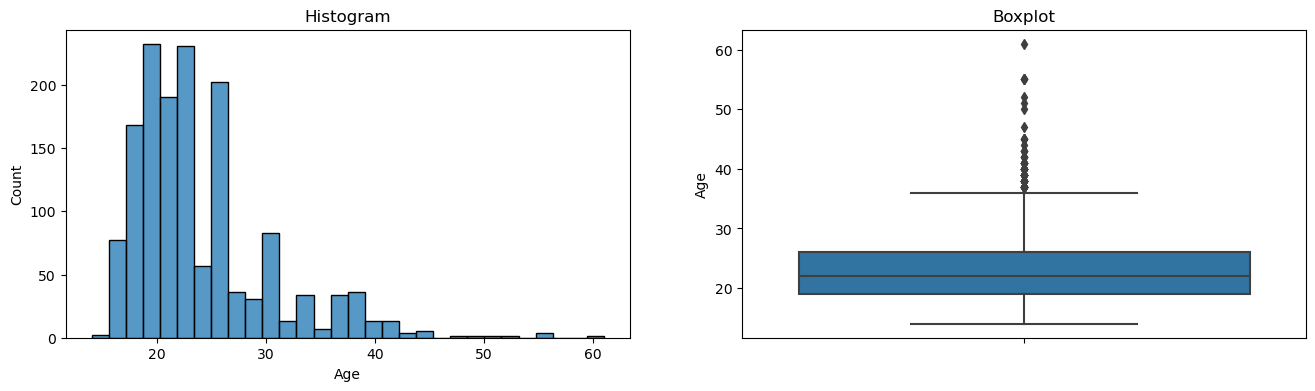

In [613]:
# Melihat histogram dan boxplot yang sudah di capping

print('Data Train')
print('\nage - Before Capping')
capping_plot(X_train, 'Age')

In [614]:
# Outlier Trimmer menggunakan metode IQR pada column Age

# caping outlier

from feature_engine.outliers import Winsorizer

winsoriser = Winsorizer(capping_method='iqr',
                                 tail='both',
                                 fold=1.5,
                                 variables=['Age'])

winsoriser.fit(X_train)

X_train = winsoriser.fit_transform(X_train)
X_test = winsoriser.transform(X_test)
winsoriser.right_tail_caps_

{'Age': 36.5}

In [615]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
936,Female,21.0,1.6,66,yes,yes,2,1,Sometimes,no,2,no,2,3,Sometimes,Public_Transportation
415,Male,14.0,1.7,72,yes,yes,3,1,Sometimes,no,1,no,2,3,no,Walking
2025,Female,21.0,1.8,137,yes,yes,3,1,Sometimes,no,2,no,3,3,Sometimes,Public_Transportation
2016,Female,25.0,1.6,102,yes,yes,3,1,Sometimes,no,3,no,3,3,Sometimes,Public_Transportation
813,Female,36.5,1.8,75,yes,yes,3,2,Sometimes,no,2,no,3,3,Sometimes,Automobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,Female,21.0,1.7,132,yes,yes,3,1,Sometimes,no,3,no,3,3,Sometimes,Public_Transportation
221,Male,23.0,1.7,82,yes,yes,2,3,Sometimes,no,3,no,3,3,Sometimes,Public_Transportation
943,Male,24.0,1.8,82,yes,yes,1,1,Sometimes,no,2,no,3,3,no,Public_Transportation
630,Female,17.0,1.8,50,no,yes,2,1,Sometimes,no,3,no,2,3,Sometimes,Public_Transportation


In [616]:
# Buat function membuat histogram dan boxplot, untuk lihat perubahan setelah capping 
def capping_plot(df, variable):
    # Definisikan figure size
    plt.figure(figsize=(16, 4))

    # membuat Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # membuat Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Data Train

age - After Capping


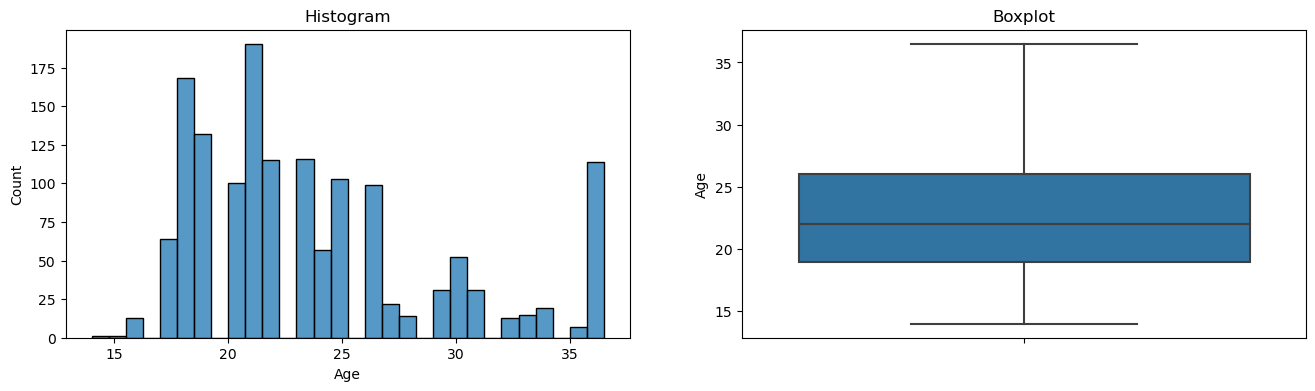

In [617]:
# Melihat histogram dan boxplot yang sudah di capping

print('Data Train')
print('\nage - After Capping')
capping_plot(X_train, 'Age')

In [618]:
# Check Target

y.value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

### Feature Selection

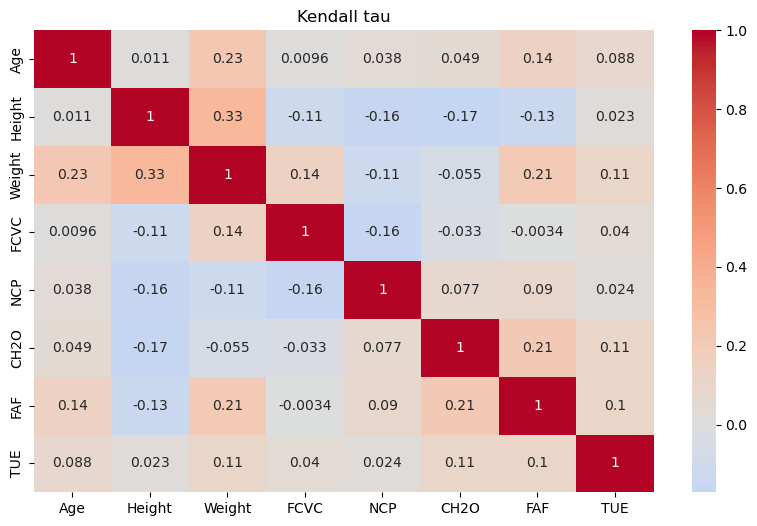

In [619]:
from scipy.stats import kendalltau

data3 = data_duplicated

kendall_corr_matrix = data3.corr(method=lambda x, y: kendalltau(x, y).correlation)

plt.figure(figsize=(10, 6))
sns.heatmap(kendall_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Kendall tau')
plt.show()

### Feature Scalling

In [620]:
y_train[:10]

936     Overweight_Level_I
415          Normal_Weight
2025      Obesity_Type_III
2016      Obesity_Type_III
813     Overweight_Level_I
957     Overweight_Level_I
142         Obesity_Type_I
350          Normal_Weight
374          Normal_Weight
240          Normal_Weight
Name: NObeyesdad, dtype: object

In [621]:
y_train

936      Overweight_Level_I
415           Normal_Weight
2025       Obesity_Type_III
2016       Obesity_Type_III
813      Overweight_Level_I
               ...         
2065       Obesity_Type_III
221     Overweight_Level_II
943      Overweight_Level_I
630     Insufficient_Weight
1739        Obesity_Type_II
Name: NObeyesdad, Length: 1477, dtype: object

In [622]:
# Scalling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


columns_to_scale = ['Age', 'Height', 'Weight']
column_ordin = ['FCVC','NCP','CAEC', 'CH2O', 'FAF', 'TUE' ,'CALC']
column_onhot = ['Gender','FAVC', 'family_history_with_overweight', 'SMOKE', 'SCC', 'MTRANS']

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable using the label encoder
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
# Create a list of transformers for the ColumnTransformer
transformers = [
    ("robust_scaler", RobustScaler(), columns_to_scale),
    ("onehot", OneHotEncoder(), column_onhot),
    ("ordinal",OrdinalEncoder(categories=[['1', '2', '3'], ['1', '2', '3'], ['no', 'Sometimes', 'Frequently', 'Always'], ['1', '2', '3'], ['1', '2', '3'], ['2', '3'], ['no', 'Sometimes', 'Frequently', 'Always']]),column_ordin)
]

preprocessor = ColumnTransformer(transformers, remainder="passthrough")

In [623]:
y_train[:10]

array([5, 1, 4, 4, 5, 5, 2, 1, 1, 1])

Melihat urutan data dari target

| Nilai  | Deskripsi              |
|-------|--------------------|
| 0 | Insufficient Weight    |
| 1 | Normal                 |
| 2 | Obesity Type I         |
| 3 | Obesity Type II        |
| 4 | Obesity Type III       |
| 5 | Overweight Level I     |
| 6 | Overweight Level II    |


In [624]:
y_train

array([5, 1, 4, ..., 5, 0, 3])

### Balancing

In [651]:
y.value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

Balancing tidak dilakukan karena data termasuk balance

# 6. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [625]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [626]:
# !pip install xgboost

In [627]:
knn_pipeline = make_pipeline(preprocessor, KNeighborsClassifier(n_jobs=-1))
svm_pipeline = make_pipeline(preprocessor, SVC())
decision_pipeline = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=42))
random_forest_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
xgboost_pipeline = make_pipeline(preprocessor, XGBClassifier(objective='multi:softmax', num_class=7, random_state=42))

In [628]:
from sklearn.model_selection import cross_val_score

classifiers = [
    ("K-Nearest Neighbors", knn_pipeline),
    ("Support Vector Classifier", svm_pipeline),
    ("Decision Tree", decision_pipeline),
    ("Random Forest", random_forest_pipeline),
    ("XGBoost", xgboost_pipeline)
]

for name, pipeline in classifiers:
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}:")
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print("="*50)


K-Nearest Neighbors:
Cross-Validation Scores: [0.78378378 0.80067568 0.8        0.78644068 0.72542373]
Mean Accuracy: 0.7792647732478242
Support Vector Classifier:
Cross-Validation Scores: [0.84797297 0.84459459 0.86440678 0.87118644 0.83050847]
Mean Accuracy: 0.8517338524965645
Decision Tree:
Cross-Validation Scores: [0.90202703 0.90878378 0.90169492 0.9220339  0.91864407]
Mean Accuracy: 0.9106367384333487


Random Forest:
Cross-Validation Scores: [0.90540541 0.94256757 0.9220339  0.90508475 0.94576271]
Mean Accuracy: 0.9241708657810352
XGBoost:
Cross-Validation Scores: [0.94256757 0.95945946 0.94237288 0.94237288 0.96271186]
Mean Accuracy: 0.9498969308291342


Model XGBoost menunjukan tingkat akurasi paling tinggi, tetapi saya memilih Random Forest untuk dilakukan Hyperparameter Tuning

# 7. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [630]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender', 'FAVC',
                                                   'family_history_with_overweight',
                                                   'SMOKE', 'SCC', 'MTRANS']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always'],
                                                                             ['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['2',
                                                                              '3'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always']]),
                                                  ['FCVC', 'NCP', 'CAEC',
                                                   'CH2O', 'FAF', 'TUE',
                                                   'CALC'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_jobs=-1))])

In [631]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender', 'FAVC',
                                                   'family_history_with_overweight',
                                                   'SMOKE', 'SCC', 'MTRANS']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always'],
                                                                             ['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['2',
                                                                              '3'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always']]),
                                                  ['FCVC', 'NCP', 'CAEC',
                                                   'CH2O', 'FAF', 'TUE',
                                                   'CALC'])])),
                ('svc', SVC())])

In [632]:
decision_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender', 'FAVC',
                                                   'family_history_with_overweight',
                                                   'SMOKE', 'SCC', 'MTRANS']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always'],
                                                                             ['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['2',
                                                                              '3'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always']]),
                                                  ['FCVC', 'NCP', 'CAEC',
                                                   'CH2O', 'FAF', 'TUE',
                                                   'CALC'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [656]:
X_train.FAVC.unique()

array(['yes', 'no'], dtype=object)

In [633]:
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender', 'FAVC',
                                                   'family_history_with_overweight',
                                                   'SMOKE', 'SCC', 'MTRANS']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always'],
                                                                             ['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['2',
                                                                              '3'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always']]),
                                                  ['FCVC', 'NCP', 'CAEC',
                                                   'CH2O', 'FAF', 'TUE',
                                                   'CALC'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [634]:
xgboost_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender', 'FAVC',
                                                   'family_history_with_overweight',
                                                   'SMOKE', 'SCC', 'MTRANS']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['1',
                                                                              '2',
                                                                              '3'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, num_class=7,
                               num_parallel_tree=None, ...))])

# 8. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

In [635]:
y_train_predict_knn = knn_pipeline.predict(X_train)
y_test_predict_knn = knn_pipeline.predict(X_test)

y_train_predict_svm = svm_pipeline.predict(X_train)
y_test_predict_svm = svm_pipeline.predict(X_test)

y_train_predict_decision = decision_pipeline.predict(X_train)
y_test_predict_decision = decision_pipeline.predict(X_test)

y_train_predict_rf = random_forest_pipeline.predict(X_train)
y_test_predict_rf = random_forest_pipeline.predict(X_test)

y_train_predict_boost = xgboost_pipeline.predict(X_train)
y_test_predict_boost = xgboost_pipeline.predict(X_test)

In [636]:
from sklearn.metrics import classification_report

classifiers = [
    ("K-Nearest Neighbors", knn_pipeline, X_train, X_test),
    ("Support Vector Classifier", svm_pipeline, X_train, X_test),
    ("Decision Tree", decision_pipeline, X_train, X_test),
    ("Random Forest", random_forest_pipeline, X_train, X_test),
    ("XGBoost", xgboost_pipeline, X_train, X_test)
]

for name, pipeline, X_train, X_test in classifiers:
    y_train_predict = pipeline.predict(X_train)
    y_test_predict = pipeline.predict(X_test)
    
    train_report = classification_report(y_train, y_train_predict)
    test_report = classification_report(y_test, y_test_predict)

    print(f"Classifier: {name}")
    print("Train Classification Report:")
    print(train_report)
    print("Test Classification Report:")
    print(test_report)
    print("="*50)
    print()

Classifier: K-Nearest Neighbors
Train Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       200
           1       0.77      0.61      0.68       197
           2       0.82      0.91      0.86       242
           3       0.93      0.97      0.95       207
           4       0.99      1.00      0.99       235
           5       0.82      0.76      0.79       208
           6       0.87      0.79      0.83       188

    accuracy                           0.86      1477
   macro avg       0.86      0.86      0.86      1477
weighted avg       0.86      0.86      0.86      1477

Test Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.88      0.73        72
           1       0.66      0.37      0.47        90
           2       0.80      0.86      0.83       109
           3       0.85      0.91      0.88        90
           4       1.00      1.00      1.00

Memilih Random Forest untuk Hyperparameter Tuning karena rata - rata akurasi 92% yang dapat memberikan prediksi yang tepat

### Hyperparameter Tuning Random Forest

In [637]:
# Define the parameter grid you want to search
param_grid = {
    # 'randomforestclassifier__ran_estimators': [100, 200, 300],  # Number of trees in the forest
    'randomforestclassifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'randomforestclassifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [647]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get Best Hyperparameter
best_params = grid_search.best_params_
print("Hyperparameter Terbaik:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Hyperparameter Terbaik:
randomforestclassifier__max_depth: 20
randomforestclassifier__min_samples_leaf: 1
randomforestclassifier__min_samples_split: 2


In [640]:
# Get Best Estimator

rf_gridcv_best = grid_search.best_estimator_

In [641]:
y_train_predict_rf_best = rf_gridcv_best.predict(X_train)
y_test_predict_rf_best = rf_gridcv_best.predict(X_test)

In [642]:
random_forest_report = classification_report(y_train, y_train_predict_rf_best, output_dict=True)
random_forest_df = pd.DataFrame(random_forest_report)

In [643]:
pd.DataFrame([random_forest_report])

,0,1,2,3,4,5,6,accuracy,macro avg,weighted avg
0,"{'precision': 1.0, 'recall': 1.0, 'f1-score': ...","{'precision': 1.0, 'recall': 1.0, 'f1-score': ...","{'precision': 1.0, 'recall': 1.0, 'f1-score': ...","{'precision': 1.0, 'recall': 1.0, 'f1-score': ...","{'precision': 1.0, 'recall': 1.0, 'f1-score': ...","{'precision': 0.9952153110047847, 'recall': 1....","{'precision': 1.0, 'recall': 0.994680851063829...",0.999323,"{'precision': 0.9993164730006835, 'recall': 0....","{'precision': 0.9993261913940387, 'recall': 0...."


In [644]:
rf_gridcv = GridSearchCV(estimator=random_forest_pipeline,
                         param_grid=param_grid,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='f1')

rf_gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('robust_scaler',
                                                                         RobustScaler(),
                                                                         ['Age',
                                                                          'Height',
                                                                          'Weight']),
                                                                        ('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'FAVC',
                                                                          'family_history_with_overweight',
                                                                          'SMOKE',
                                                                          'SCC',
                                                                          'MTRANS']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(categories=[['1',
                                                                                                     '2',
                                                                                                     '3'],
                                                                                                    ['1',
                                                                                                     '2',
                                                                                                     '3'],
                                                                                                    ['n...
                                                                                                     'Sometimes',
                                                                                                     'Frequently',
                                                                                                     'Always']]),
                                                                         ['FCVC',
                                                                          'NCP',
                                                                          'CAEC',
                                                                          'CH2O',
                                                                          'FAF',
                                                                          'TUE',
                                                                          'CALC'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20,
                                                               30],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10]},
             scoring='f1', verbose=2)

# 9. Model Saving

Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. **Dengan melihat hasil Model Evaluation, pilihlah satu model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.**

In [645]:
import pickle

# Menyimpan objek 'model_knn' ke dalam berkas 'model_knn.pkl' menggunakan modul 'pickle'
with open('model_rf.pkl', 'wb') as file_2:
    pickle.dump(rf_gridcv_best, file_2)

# 10. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled. Gunakan model terbaik berdasarkan hasil Model Evaluation. Notebook Model Inference haruslah berbeda dengan notebook saat pembuatan model dilakukan.

`Inference dilakukan di file P1M2_athalla_rafly_inf.ipynb`

# 11. Pengambilan Kesimpulan

Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

Kesimpulan :  

Dari Model yang sudah dibuat, Model sudah cukup baik dimana accuracy scorenya sudah cukup tinggi dan bagus. Data termasuk data yang bagus, karena tidak ada missing values.

Langkah awal sebelum melakukan prediksi adalah dengan melihat pola hidup dan perilaku dari seseorang tersebut sebagai langkah awalnya. Dapat disimpulkan bahwa Rata - rata seseorang mulai termasuk obesitas jika melakukan pola hidup tidak sehat seperti jarang beraktivitas, konsumsi makanan berkalori tinggi, makan dengan porsi besar dan sering dalam sehari, kurang minum air putih, sering konsumsi gula dengan kadar tinggi seperti pada alkohol dan faktor pendukung lainnya jika memiliki riwayat keturunan obesitas juga.

### Conceptual Problems


Jawab pertanyaan berikut:

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging!

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih!

3.  Jelaskan apa yang dimaksud dengan Cross Validation!



1. Latar Belakang Bagging (Bootstrap Aggregating): Bagging adalah metode dalam machine learning yang dirancang untuk mengatasi masalah variabilitas dalam model. Variabilitas dalam model bisa muncul jika model terlalu kompleks dan cenderung overfitting, atau jika model sangat sensitif terhadap variasi dalam data pelatihan.
Cara Kerja Bagging: Bagging bekerja dengan membagi data pelatihan menjadi beberapa bagian kecil secara acak dengan pengembalian. Setiap bagian ini digunakan untuk melatih model (biasanya model yang sama, seperti pohon keputusan) secara terpisah. Setelah semua model dilatih, hasil prediksi dari masing-masing model digabungkan, misalnya dengan mengambil rata-rata (untuk regresi) atau dengan melakukan pemungutan suara mayoritas (untuk klasifikasi). Dengan menggabungkan hasil dari berbagai model ini, variabilitas berkurang, dan hasilnya cenderung menjadi model ensemble yang lebih stabil dan akurat.
Perbedaan Cara Kerja Algoritma Random Forest dan Boosting:

2. Random Forest: Random Forest juga menggunakan pohon keputusan, tetapi dengan pendekatan yang berbeda. Ia membagi data pelatihan menjadi banyak subset secara acak dan juga memilih subset fitur secara acak saat membangun setiap pohon keputusan. Hasil dari berbagai pohon ini kemudian digabungkan melalui pemungutan suara mayoritas atau mengambil rata-rata untuk membuat prediksi akhir. Setiap pohon dalam Random Forest bekerja secara independen.
Boosting: Algoritma Boosting seperti AdaBoost atau XGBoost membangun model secara berurutan. Setiap model berusaha untuk memperbaiki kesalahan model sebelumnya. Data pelatihan diberi bobot, dan setiap model fokus pada sampel yang salah diberi bobot lebih besar. Prediksi dari setiap model ditimbang ketika menghasilkan prediksi akhir.
Cross Validation (Validasi Silang):

3. Cross Validation adalah teknik penting dalam mengevaluasi performa model machine learning. Ini digunakan untuk mengukur sejauh mana model dapat menggeneralisasi dari data pelatihan ke data yang belum pernah dilihat sebelumnya.
Cara Kerja Cross Validation:
Data pelatihan dibagi menjadi beberapa bagian (fold) sebanyak k tertentu.
Model dilatih k kali, setiap kali menggunakan k-1 fold sebagai data pelatihan dan 1 fold sebagai data validasi.
Kinerja model diukur pada setiap iterasi, dan nilai-nilai kinerja ini diambil rata-rata untuk memberikan perkiraan kinerja model.
Cross Validation membantu mencegah overfitting dan memberikan perkiraan yang lebih konsisten tentang sejauh mana model akan bekerja pada data yang belum pernah dilihat sebelumnya.